In [1]:
import sys
sys.path.append('../../ABEL')
from abel import *
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import time
import scipy.constants as SI 
import abel.utilities.plasma_physics as pp
import matplotlib.pyplot as plt

In [3]:
## define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 50e-6 # [m]
driver.z_offset = 580e-6 # [m]
driver.emit_nx, driver.emit_ny = 80e-6, 80e-6 # [m rad]
driver.beta_x, driver.beta_y = 5, 5 #30e-3, 30e-3 [m]
driver.num_particles = 100000
driver.jitter.x = 0#2e-7 # [m] 2e-6
driver.jitter.y = 0#2e-7 # [m] 100e-9
driver.jitter.t = 0 #10e-15 # [m]
driver.symmetrize = True
driver.seed = 1

test_particle = SourceSingleParticle()
test_particle.energy = 1500e9 # [eV]
test_particle.z_offset = 0 # [m]
test_particle.x_offset = 3e-6 # [m]
test_particle.y_offset = 3e-6 # [m]
test_particle.y_angle = 0 #test_particle.x_offset/pp.beta_matched(2e21, test_particle.energy)
test_particle.x_angle = 0

# define a stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 20 # [m]
stage.plasma_density = 2e21 # [m^-3]
stage.nom_energy_gain = 31.9e9/(11/stage.length) # [eV]
stage.radiation_reaction = False
stage.ion_motion = False
stage.beam_ionization=False
stage.ramp_beta_mag = 5
stage.num_nodes = 16
stage.test_particle_source = test_particle

# define witness bunch
witness = SourceBasic()
witness.charge = -1e10 * SI.e # [C]
witness.energy = 1500e9 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 28e-6 # [m]
witness.z_offset = 0 # [m]
witness.emit_nx, witness.emit_ny = 80e-6, 80e-6 # [m rad]
witness.beta_x = stage.matched_beta_function(witness.energy)
witness.beta_y = witness.beta_x
witness.num_particles = 50000
witness.x_offset, witness.y_offset = 0, 0 # [m]
witness.jitter.x = 0
witness.symmetrize = True
witness.seed = driver.seed

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

linac = Linac()
linac.stage = stage
linac.source = witness
linac.num_stages = 1
shots = 1

NameError: name 'StageHipace' is not defined

In [11]:
linac.run(f'linac_hipace_RR_{stage.radiation_reaction}', num_shots=shots, overwrite=True, parallel=False);

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 1500.1 GeV, -1.60 nC, 1.0% rms, 78.8/79.7 µm-rad)
>> Finished HiPACE++ (job 6484375): 100%|█| 7487/7487 [06:58<00:00, 17.91 steps/
Tracking element 2 (StageHipace, stage 1, s = 11.0 m, 1533.6 GeV, -1.60 nC, 1.0% rms, 78.8/79.8 µm-rad)


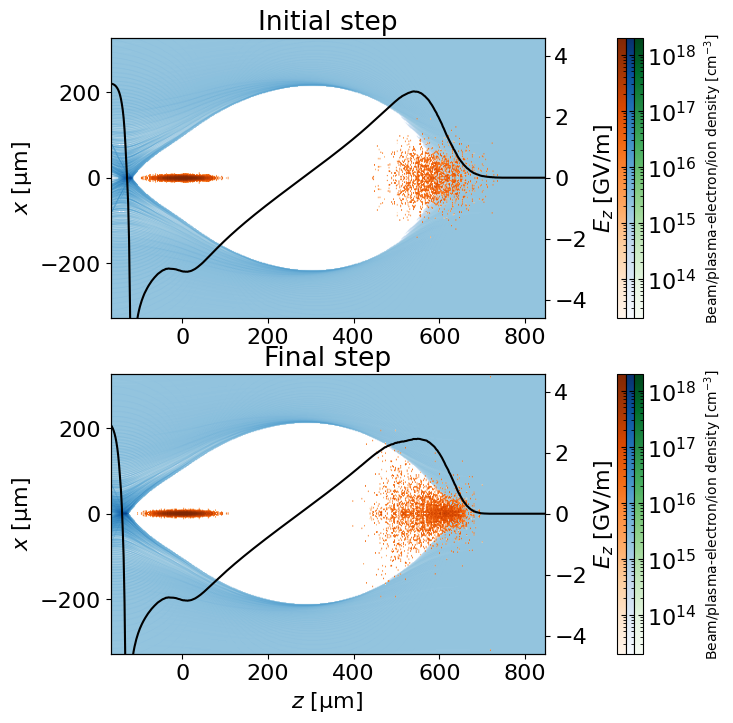

In [12]:
fig = linac.stages[0].plot_wake()

In [13]:
## define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 50e-6 # [m]
driver.z_offset = 580e-6 # [m]
driver.emit_nx, driver.emit_ny = 80e-6, 80e-6 # [m rad]
driver.beta_x, driver.beta_y = 5, 5 #30e-3, 30e-3 [m]
driver.num_particles = 100000
driver.jitter.x = 0#2e-7 # [m] 2e-6
driver.jitter.y = 0#2e-7 # [m] 100e-9
driver.jitter.t = 0 #10e-15 # [m]
driver.symmetrize = True
driver.seed = 1

test_particle = SourceSingleParticle()
test_particle.energy = 1500e9 # [eV]
test_particle.z_offset = 0 # [m]
test_particle.x_offset = 4e-6 # [m]
test_particle.y_offset = 0 # [m]
test_particle.y_angle = test_particle.x_offset/pp.beta_matched(2e21, test_particle.energy)
test_particle.x_angle = 0

# define a stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 11 # [m]
stage.plasma_density = 2e21 # [m^-3]
stage.nom_energy_gain = 31.9e9/(11/stage.length) # [eV]
stage.radiation_reaction = True
stage.ion_motion = False
stage.beam_ionization=False
stage.ramp_beta_mag = 5
stage.num_nodes = 16
stage.test_particle_source = test_particle

# define witness bunch
witness = SourceBasic()
witness.charge = -1e10 * SI.e # [C]
witness.energy = 1500e9 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 28e-6 # [m]
witness.z_offset = 0 # [m]
witness.emit_nx, witness.emit_ny = 80e-6, 80e-6 # [m rad]
witness.beta_x = stage.matched_beta_function(witness.energy)
witness.beta_y = witness.beta_x
witness.num_particles = 50000
witness.x_offset, witness.y_offset = 0, 0 # [m]
witness.jitter.x = 0
witness.symmetrize = True
witness.seed = driver.seed

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

linac2 = Linac()
linac2.stage = stage
linac2.source = witness
linac2.num_stages = 1
shots = 1

In [14]:
linac2.run(f'linac_hipace_RR_{stage.radiation_reaction}', num_shots=shots, overwrite=True, parallel=False);

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 1500.1 GeV, -1.60 nC, 1.0% rms, 78.8/79.7 µm-rad)
>> Finished HiPACE++ (job 6484449): 100%|█| 7487/7487 [02:12<00:00, 56.45 steps/
Tracking element 2 (StageHipace, stage 1, s = 11.0 m, 1531.8 GeV, -1.60 nC, 1.0% rms, 78.7/79.6 µm-rad)


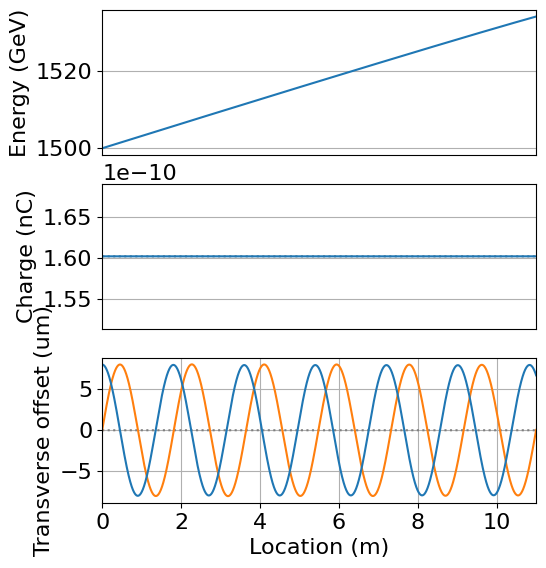

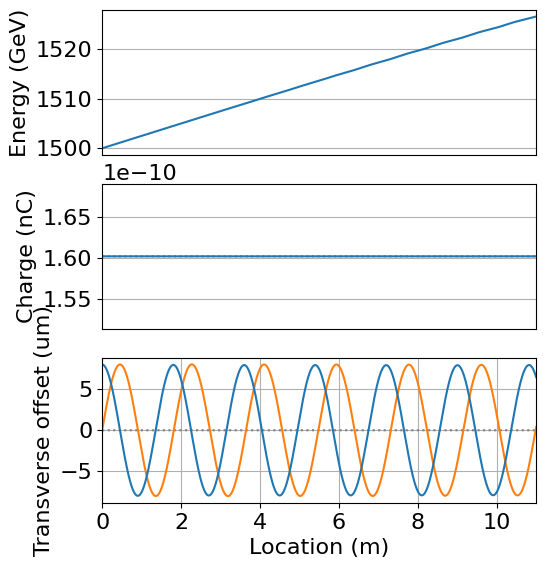

In [29]:
fig1, E1 = linac.stages[0].plot_test_particle_evolution()
fig2, E2 = linac2.stages[0].plot_test_particle_evolution()
z = np.linspace(0,stage.length, len(E1))
fig2.savefig('hipace_stage_evolution', bbox_inches = 'tight')

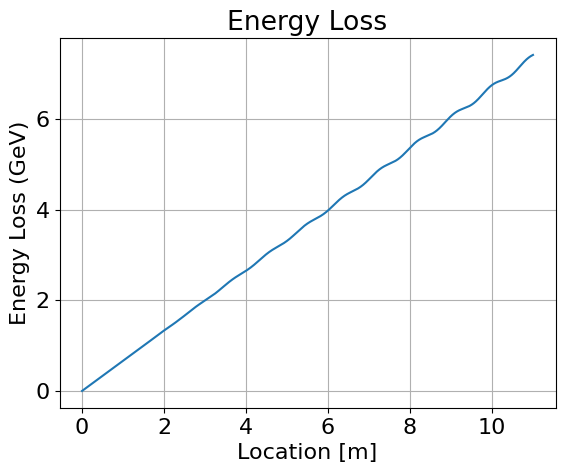

In [28]:
fig = plt.figure()
plt.plot(z, (E1-E2)/1e9)
plt.title('Energy Loss')
plt.xlabel('Location [m]')
plt.ylabel('Energy Loss (GeV)')
plt.grid()
fig.savefig('Energy_loss_hipace.png', bbox_inches = 'tight')

In [22]:
print(linac.stages[0].test_particle_evolution.x[0])

8e-06
